In [1]:
import CRISP

In [2]:
!pwd

/mnt/c/Users/sahaC/Desktop/side_project/molssi_best_practices/CRISP/example


# Simulation Utility

### Atomic Indices

In [3]:
from CRISP.simulation_utility.atomic_indices import run_atom_indices

help(run_atom_indices)


Help on function run_atom_indices in module CRISP.simulation_utility.atomic_indices:

run_atom_indices(file_path, output_folder, frame_index=0, cutoffs=None)
    Run atom index extraction and save results to files.
    
    Parameters
    ----------
    file_path : str
        Path to the ASE trajectory file
    output_folder : str
        Directory where output files will be saved
    frame_index : int, optional
        Index of the frame to analyze (default: 0)
    cutoffs : dict, optional
        Dictionary with atom symbol pairs as keys and cutoff distances as values
        
    Returns
    -------
    None
        Results are saved to the specified output folder:
        - lengths.npy: Dictionary of number of atoms per element
        - {symbol}_indices.npy: Numpy array of atom indices for each element
        - cutoff/{symbol1}-{symbol2}_cutoff.csv: CSV files with atom pairs within cutoff



In [4]:
from CRISP.simulation_utility.atomic_indices import run_atom_indices

file_path = "./wrapped_traj.traj"
output_folder = './indices_new/'

cutoffs = {
    ("O", "H"): 1.2,
    ("Si", "O"): 1.8,
    ("Al", "Si"): 3.2,
    ("O", "O"): 3.0
}

run_atom_indices(file_path, output_folder, frame_index=10, cutoffs=cutoffs)

Length of H indices: 120
Length of Si indices: 168
Length of Al indices: 24
Length of O indices: 432
Outputs saved.
Saved cutoff indices for O-H to ./indices_new/cutoff/O-H_cutoff.csv
Saved cutoff indices for Si-O to ./indices_new/cutoff/Si-O_cutoff.csv
Saved cutoff indices for Al-Si to ./indices_new/cutoff/Al-Si_cutoff.csv
Saved cutoff indices for O-O to ./indices_new/cutoff/O-O_cutoff.csv


### Atomic_traj_linemap

In [3]:
from CRISP.simulation_utility.atomic_traj_linemap import plot_atomic_trajectory
help(plot_atomic_trajectory)

Help on function plot_atomic_trajectory in module CRISP.simulation_utility.atomic_traj_linemap:

plot_atomic_trajectory(traj_path: str, selected_indices: List[int], output_path: str, frame_skip: int = 100, plot_title: str = None, show_plot: bool = False, atom_size_scale: float = 1.0)
    Create a 3D visualization of atom trajectories with all atom types displayed.
    
    Parameters
    ----------
    
    traj_path : str
        Path to the ASE trajectory file
    selected_indices : List[int]
        Atom indices to plot trajectories for
    output_path : str
        Path to save the generated HTML visualization
    frame_skip : int, optional
        Use every nth frame from the trajectory (default: 100)
    plot_title : str, optional
        Custom title for the plot (default: auto-generated)
    show_plot : bool, optional
        Whether to display the plot (default: False)
    atom_size_scale : float, optional
        Scale factor for atom sizes (default: 1.0)



In [5]:
from CRISP.simulation_utility.atomic_traj_linemap import plot_atomic_trajectory

# Parameters for trajectory visualization
traj_file = "./wrapped_traj.traj"
output_dir = "./atomic_traj_linemap/o_atom_trajectory.html"
selected_atoms = [593]
frame_skip = 1  

# Run the trajectory visualization
fig = plot_atomic_trajectory(
    traj_path=traj_file, 
    selected_indices=selected_atoms,
    output_path=output_dir,
    frame_skip=frame_skip,
    plot_title="Oxygen Atom Movement Analysis",
    show_plot=False,  
    atom_size_scale=1.2  
)

Loading trajectory from ./wrapped_traj.traj (using every 1th frame)...
Loaded 21 frames from trajectory
Selected 1 atoms for trajectory plotting: [593]
Simulation box dimensions: [24.34499931 24.34499931 24.34499931] Å
Analyzing atom types in first frame (total atoms: 744, max index: 743)...
Found 4 atom types: Si, Al, O, H
Plot has been saved to ./atomic_traj_linemap/o_atom_trajectory.html


### Error Analysis

In [5]:
from CRISP.simulation_utility.error_analysis import autocorrelation_analysis, block_analysis

help(autocorrelation_analysis)

Help on function autocorrelation_analysis in module CRISP.simulation_utility.error_analysis:

autocorrelation_analysis(data, max_lag=None, threshold=0.05)
    Perform autocorrelation analysis on time series data.
    
    Parameters
    ----------
    data : numpy.ndarray
        1D array for scalar data or 2D array for vector data
    max_lag : int, optional
        Maximum lag time for autocorrelation calculation (default: min(1000, N/10))
    threshold : float, optional
        Threshold for determining optimal lag time (default: 0.05)
        
    Returns
    -------
    dict
        Dictionary containing:
        - mean: Mean value(s) of the data
        - acf_err: Statistical error estimated from autocorrelation
        - std: Standard deviation of the data
        - tau_int: Integrated autocorrelation time
        - optimal_lag: Optimal lag time determined by threshold



In [6]:
help(block_analysis)

Help on function block_analysis in module CRISP.simulation_utility.error_analysis:

block_analysis(data, convergence_tol=0.001)
    Perform block averaging analysis to estimate statistical errors.
    
    Parameters
    ----------
    data : numpy.ndarray
        1D array of time series data
    convergence_tol : float, optional
        Tolerance for determining convergence of block error (default: 0.001)
        
    Returns
    -------
    dict
        Dictionary containing:
        - mean: Mean value of the data
        - block_err: Statistical error estimated from block averaging
        - std: Standard deviation of the data
        - converged_blocks: Number of blocks at convergence



In [7]:
import numpy as np

data_positions = np.load("./error/positions.npy")
res_positions = autocorrelation_analysis(data_positions,max_lag=500)
print(res_positions)

{'mean': array([11.84336219,  6.56230374,  6.34512439]), 'acf_err': array([0.11042688, 0.0483816 , 0.06882431]), 'std': array([0.21002227, 0.09201757, 0.13089782]), 'tau_int': 69.11286151958006, 'optimal_lag': 109}


/home/saha/anaconda3/envs/molssi_best_practices/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/home/saha/anaconda3/envs/molssi_best_practices/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [8]:
data_energy = np.loadtxt('./error/md_20k.log', skiprows=1, usecols=2)
acf_error = autocorrelation_analysis(data_energy)
block_error = block_analysis(data_energy, convergence_tol=0.001)

print(acf_error)
print(block_error)

{'mean': -3065.5796212000005, 'acf_err': 0.0054549762052233325, 'std': 0.6834300195116669, 'tau_int': 0.318542675191111, 'optimal_lag': 9}
{'mean': -3065.5796212000005, 'block_err': 0.02208793396091249, 'std': 0.6834300195116669, 'converged_blocks': 32}


### Interatomic Distances

In [3]:
from CRISP.simulation_utility.interatomic_distances import distance_calculation

help(distance_calculation)

Help on function distance_calculation in module CRISP.simulation_utility.interatomic_distances:

distance_calculation(traj_path: str, frame_skip: int, index_type: Union[str, List[Union[int, str]]] = 'all') -> Tuple[List[numpy.ndarray], List[numpy.ndarray]]
    Calculate distance matrices for multiple frames in a trajectory.
    
    Parameters
    ----------
    traj_path : str
        Path to the trajectory file
    frame_skip : int
        Read every nth frame (n=frame_skip)
    index_type : str, list, or None, optional
        Specification for which atoms to select for sub-matrix (default: "all")
        
    Returns
    -------
    Tuple[List[np.ndarray], List[np.ndarray]]
        Two lists containing:
        1. Full distance matrices for all frames
        2. Sub-matrices for specified atoms
        
    Raises
    ------
    ValueError
        If no frames were found in the trajectory



In [4]:
from CRISP.simulation_utility.interatomic_distances import save_distance_matrices

help(save_distance_matrices)

Help on function save_distance_matrices in module CRISP.simulation_utility.interatomic_distances:

save_distance_matrices(full_dms: List[numpy.ndarray], sub_dms: List[numpy.ndarray], index_type: Union[str, List[Union[int, str]]] = 'all', output_dir: str = 'distance_calculations') -> None
    Save distance matrices to pickle file.
    
    Parameters
    ----------
    full_dms : List[np.ndarray]
        List of full distance matrices
    sub_dms : List[np.ndarray]
        List of sub-matrices for specified atoms
    index_type : str, list, or None, optional
        Type of index selection used (default: "all")
    output_dir : str, optional
        Directory to save output file (default: "distance_calculations")
        
    Returns
    -------
    None
        Saves results to disk



In [5]:
from CRISP.simulation_utility.interatomic_distances import distance_calculation

traj_path = "./wrapped_traj.traj"
frame_skip = 10
index_type = ["O"]  

full_dms, sub_dms = distance_calculation(traj_path, frame_skip, index_type)

In [6]:
save_distance_matrices(full_dms, sub_dms, index_type, output_dir="distance_calculations_zeo")

Distance matrices saved in 'distance_calculations_zeo/distance_matrices.pkl'


### Subsampling

In [3]:
from CRISP.simulation_utility.subsampling import run_subsample
help(run_subsample)

Help on function run_subsample in module CRISP.simulation_utility.subsampling:

run_subsample(filename, output_dir, n_samples=50, index_type='all', file_format=None, skip=1)
    Perform FPS (Farthest Point Sampling) on a trajectory.
    
    Parameters
    ----------
    filename : str
        Path to trajectory file (can include wildcards)
    output_dir : str
        Directory to save output files
    n_samples : int, optional
        Number of structures to subsample (default: 50)
    index_type : str, list, or None, optional
        Atom indices to focus the subsampling on (default: "all")
    file_format : str, optional
        File format of the trajectories (default: None, auto-detect)
    skip : int, optional
        Read every n-th frame from trajectory (default: 1)
        
    Returns
    -------
    list
        List of selected ASE Atoms objects (subsampled frames)



In [4]:
from CRISP.simulation_utility.subsampling import run_subsample

filename = "./Subsmapling/local_minima.traj"
n_samples = 50
index_type = "all"
file_format = "traj"
skip = 10


FPS_traj = run_subsample(filename=filename,
                     output_dir="./Subsmapling/subsampled_traj",
                     n_samples=50,
                     index_type=index_type,
                     file_format=file_format,
                     skip=skip)


Successfully wrote 50 frames to ./Subsmapling/subsampled_traj/subsampled_trajectory.xyz


# Data Analysis

### CN_Calculation

In [3]:
from CRISP.data_analysis.cn_cal import calculate_atom_coordination
help(calculate_atom_coordination)

Help on function calculate_atom_coordination in module CRISP.data_analysis.cn_cal:

calculate_atom_coordination(file_path: str, output_dir: str, frame_skip: int, index_type: Union[str, List[Union[int, str]]], cutoffs: Dict[Tuple[str, str], float], atom: str, dm_path: Optional[str] = None, plot_data: bool = False) -> None
    Calculate coordination numbers for specified atom types across a trajectory.
    
    Parameters:
        file_path: str
            Path to the ASE trajectory file
        output_dir: str
            Directory to save output files
        frame_skip: int
            Number of frames to skip between calculations
        index_type: Union[str, List[Union[int, str]]]
            Specifier for which atom indices to include
        cutoffs: Dict[Tuple[str, str], float]
            Dictionary mapping a pair of atom symbols to cutoff distance
        atom: str
            Chemical symbol of the atom type to calculate coordination for
        dm_path: Optional[str]
      

Processing trajectory with 21 frames (every 1th frame)
Saved distance matrices to ./CN_Data/distance_matrices.npy
Coordination data for first frame: {192: 6, 193: 6, 194: 6, 195: 6, 196: 6, 197: 6, 198: 6, 199: 6, 200: 6, 201: 7, 202: 6, 203: 6, 204: 6, 205: 6, 206: 6, 207: 6, 208: 6, 209: 6, 210: 6, 211: 6, 212: 7, 213: 7, 214: 8, 215: 7, 216: 7, 217: 7, 218: 7, 219: 7, 220: 6, 221: 6, 222: 6, 223: 6, 224: 6, 225: 6, 226: 6, 227: 6, 228: 6, 229: 6, 230: 6, 231: 6, 232: 6, 233: 6, 234: 6, 235: 6, 236: 6, 237: 6, 238: 6, 239: 6, 240: 6, 241: 6, 242: 6, 243: 6, 244: 7, 245: 6, 246: 6, 247: 6, 248: 6, 249: 6, 250: 6, 251: 6, 252: 7, 253: 7, 254: 7, 255: 6, 256: 6, 257: 6, 258: 6, 259: 6, 260: 6, 261: 7, 262: 7, 263: 7, 264: 6, 265: 6, 266: 6, 267: 6, 268: 6, 269: 6, 270: 6, 271: 6, 272: 7, 273: 7, 274: 7, 275: 7, 276: 6, 277: 6, 278: 6, 279: 6, 280: 6, 281: 6, 282: 6, 283: 6, 284: 7, 285: 6, 286: 6, 287: 6, 288: 6, 289: 6, 290: 6, 291: 6, 292: 7, 293: 7, 294: 6, 295: 6, 296: 6, 297: 6, 29

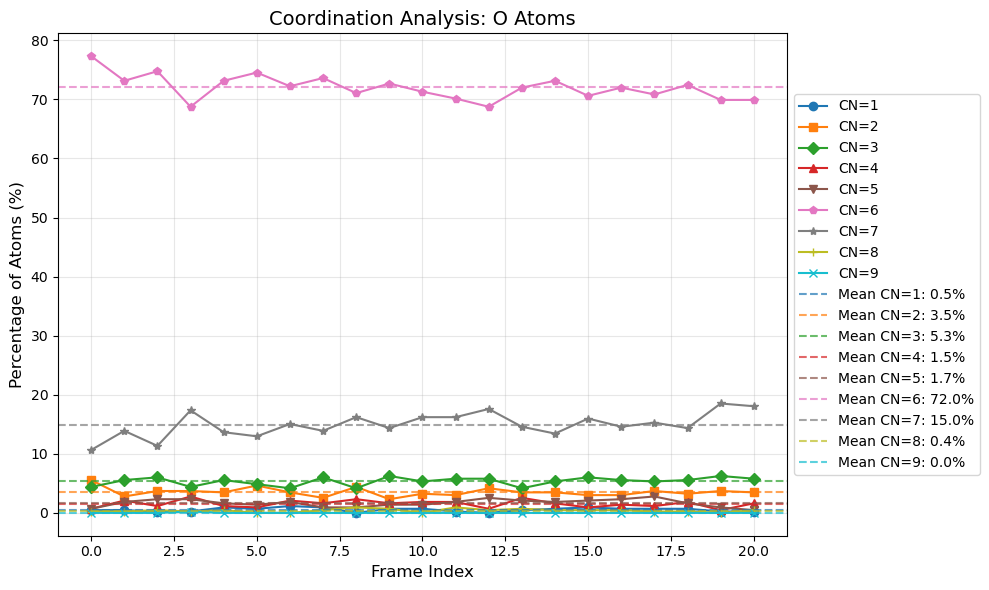

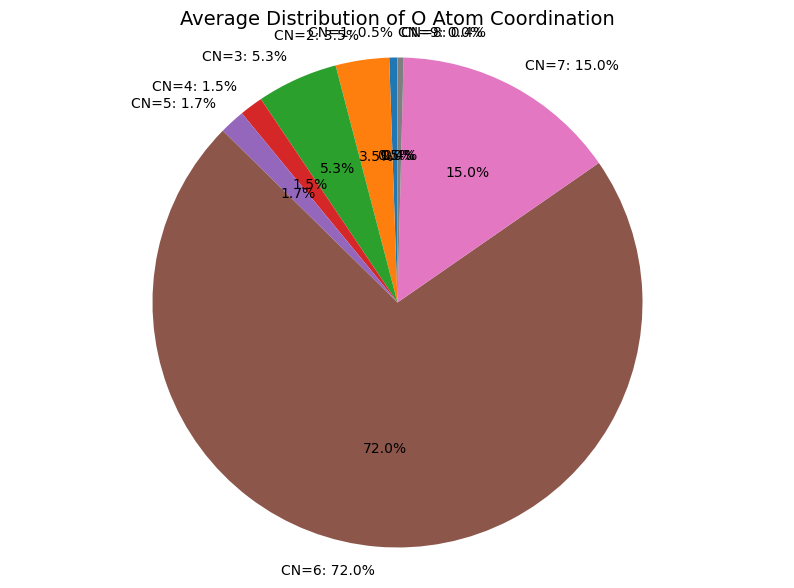

Generated coordination plots for O atoms:
  - Time series plot: ./CN_Data/O_coordination_time_series.png
  - Distribution pie chart: ./CN_Data/O_coordination_distribution.png
  - Statistics file: ./CN_Data/O_coordination_statistics.txt
Plots generated and saved in ./CN_Data


In [9]:
from CRISP.data_analysis.cn_cal import calculate_atom_coordination

# Parameters for H-O coordination analysis
traj_file = "./wrapped_traj.traj"
output_dir = "./CN_Data"
frame_skips = 1
index_type = ["O", "O"]
cutoffs = {("O", "O"): 3.0}
atom = "O"

# Run with automatic plotting (plot_data=True is the default)
calculate_atom_coordination(
    traj_file, 
    output_dir, 
    frame_skips, 
    index_type, 
    cutoffs, 
    atom,
    plot_data=True
)


### Hydrogen_Bond_Calculation

In [3]:
from CRISP.data_analysis.h_bond import analyze_hydrogen_bonds
help(analyze_hydrogen_bonds)

Help on function analyze_hydrogen_bonds in module CRISP.data_analysis.h_bond:

analyze_hydrogen_bonds(traj_path: str, output_dir: str, oxygen_indices: Union[str, List[int], numpy.ndarray, NoneType] = None, hydrogen_indices: Union[str, List[int], numpy.ndarray, NoneType] = None, frame_skip: int = 1, oxygen_oxygen_distance_threshold: float = 3.5, oxygen_hydrogen_distance_threshold: float = 1.2, angle_cutoff: float = 30.0, dm_path: Optional[str] = None)
    Analyze hydrogen bonds in a molecular dynamics trajectory.
    
    Parameters
    ----------
    traj_path : str
        Path to the ASE trajectory file
    output_dir : str
        Directory to save output files
    oxygen_indices : Optional[Union[str, List[int], np.ndarray]], optional
        Oxygen atom indices (default: None, uses all O atoms)
    hydrogen_indices : Optional[Union[str, List[int], np.ndarray]], optional
        Hydrogen atom indices (default: None, uses all H atoms)
    frame_skip : int, optional
        Number of 

In [4]:
from CRISP.data_analysis.h_bond import analyze_hydrogen_bonds

traj_file = "./wrapped_traj.traj"
output_dir = "./H_Bond_Data"
frame_skips = 10
oxygen_indices = "O"  # Can be a numpy file, list of indices, or chemical symbol
hydrogen_indices = "H"  # Can be a numpy file, list of indices, or chemical symbol
oo_threshold = 3.5
oh_threshold = 1.2
angle_cutoff = 30.0
# dm_path = None  # Optional path to pre-computed distance matrices

# Call the function
analyze_hydrogen_bonds(
    traj_file,
    output_dir,
    oxygen_indices,
    hydrogen_indices,
    frame_skips,
    oo_threshold,
    oh_threshold,
    angle_cutoff)

Analyzing 3 frames from trajectory
Using 432 oxygen atoms for hydrogen bond analysis
Using 120 hydrogen atoms for hydrogen bond analysis
Analysis complete. Results saved to ./H_Bond_Data


[82, 96, 95]

### Radial_Distribution_Function

In [3]:
from CRISP.data_analysis.prdf import analyze_rdf
help(analyze_rdf)

Help on function analyze_rdf in module CRISP.data_analysis.prdf:

analyze_rdf(use_prdf: bool, rmax: float, traj_path: str, nbins: int = 100, frame_skip: int = 10, output_filename: Optional[str] = None, atomic_indices: Optional[Tuple[List[int], List[int]]] = None, output_dir: str = 'custom_ase')
    Analyze trajectory and calculate radial distribution functions.
    
    Parameters
    ----------
    use_prdf : bool
        Whether to calculate partial RDF (True) or total RDF (False)
    rmax : float
        Maximum radius for RDF calculation
    traj_path : str
        Path to trajectory file
    nbins : int, optional
        Number of bins for histogram (default: 100)
    frame_skip : int, optional
        Number of frames to skip between analyses (default: 10)
    output_filename : Optional[str], optional
        Custom filename for output (default: None, auto-generated)
    atomic_indices : Optional[Tuple[List[int], List[int]]], optional
        Tuple of (reference_indices, target_i

In [4]:
traj_file = "./wrapped_traj.traj"
rmax = 10.0
nbins = 50
frame_skip = 10
output_dir = "custom_ase"
output_filename = None  # or specify a filename like "output.pkl"
use_prdf = False  # Set to True if you want to calculate partial RDF
atomic_indices = None  # Set to a tuple of lists if use_prdf is True, e.g., ([10, 1])

# Call the analyze_rdf function directly
analyze_rdf(
    use_prdf=use_prdf,
    rmax=rmax,
    traj_path=traj_file,
    nbins=nbins,
    frame_skip=frame_skip,
    output_filename=output_filename,
    atomic_indices=atomic_indices,
    output_dir=output_dir
)

Data saved in 'custom_ase/rdf_total.pkl'


In [5]:
import pickle
import numpy as np

output_path = "./custom_ase/rdf_total.pkl"

with open(output_path, "rb") as f:
    data = pickle.load(f)

In [6]:
data

{'x_data': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
        2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1,
        5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7,
        7.9, 8.1, 8.3, 8.5, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9]),
 'y_data_all': [array([0.        , 0.        , 0.        , 0.        , 1.9718745 ,
         0.72000827, 0.11046619, 2.69199283, 4.04095596, 0.32752256,
         0.19284964, 0.18821712, 1.35079037, 2.44705927, 0.73007803,
         1.07276987, 0.5752447 , 1.0227616 , 1.51520054, 1.2410399 ,
         0.99458268, 1.15326674, 0.7948959 , 0.78690421, 1.17754432,
         1.30073005, 1.09143094, 0.81532365, 0.83891743, 0.87954062,
         1.0318589 , 1.06459273, 1.04574658, 1.04801382, 0.95154212,
         0.85219105, 0.96222428, 1.15571308, 0.98170224, 0.6853431 ,
         0.85931616, 1.0948163 , 1.11481577, 0.90793863, 0.92886958,
         1.06358149, 1.05166462, 0.97590231, 1.03858776, 0.9966252 ]),


### Mean Square Displacement

In [5]:
from CRISP.data_analysis.msd import calculate_save_msd
help(calculate_save_msd)

Help on function calculate_save_msd in module CRISP.data_analysis.msd:

calculate_save_msd(traj_file, timestep_value, indices_file=None, ignore_n_images=0, output_file='msd_results.csv', frame_skip=1)
    Calculate MSD data and save to CSV file.
    
    Parameters:
        traj_file: Path to the ASE trajectory file
        timestep_value: Simulation timestep in ASE time units
        indices_file: Path to file containing atom indices
        ignore_n_images: Number of initial images to ignore
        output_file: Output CSV file path
        frame_skip: Number of frames to skip between samples
    
    Returns:
        msd_values: Mean square displacement values
        msd_times: Corresponding time values in femtoseconds



In [3]:
from CRISP.data_analysis.msd import analyze_from_csv
help(analyze_from_csv)

Help on function analyze_from_csv in module CRISP.data_analysis.msd:

analyze_from_csv(csv_file='msd_results.csv', fit_start=None, fit_end=None, with_intercept=False, plot=False)
    Analyze MSD data from a CSV file.
    
    Parameters:
        csv_file: Path to the CSV file containing MSD data
        fit_start: Start index for fitting
        fit_end: End index for fitting
        with_intercept: Whether to fit with intercept
        plot: Whether to plot MSD vs time
    
    Returns:
        D: Diffusion coefficient
        error: Statistical error



In [4]:
from CRISP.data_analysis.msd import calculate_save_msd
from ase.units import fs

traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
timestep = 50.0 * fs

msd_values, msd_times = calculate_save_msd(
    traj_file=traj_file,
    timestep_value=timestep,
    indices_file=indices_file,
    output_file="msd_results.csv",
    frame_skip=100
)



Loaded full trajectory with 22000 frames
Using 220 frames after skipping every 100 frames
Loaded 72 atom indices
Using adjusted timestep: 5000.0 * fs (original: 50.00000000000001 * fs)
Calculating MSD...
MSD data has been saved to msd_results.csv


Total data points in file: 220
Loaded MSD data from msd_results.csv


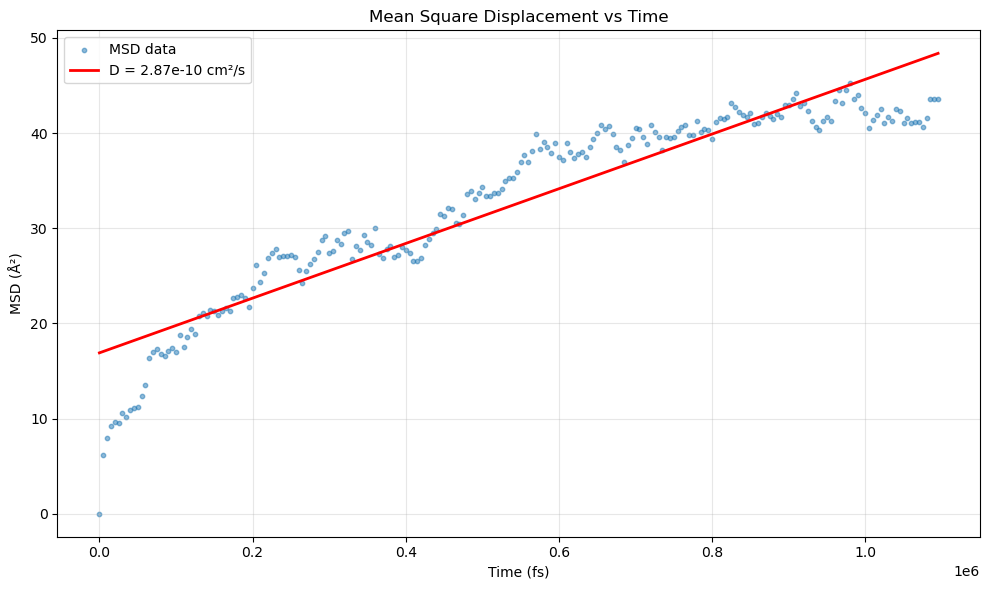

Diffusion Coefficient: 2.87e-10 cm²/s
Error: 7.35e-12 cm²/s


In [2]:
from CRISP.data_analysis.msd import analyze_from_csv
import pandas as pd

# First, check how many data points you have
df = pd.read_csv("msd_results.csv")
print(f"Total data points in file: {len(df)}")

# Then use a valid fit_end value
D, error = analyze_from_csv(
    csv_file="msd_results.csv",
    fit_start=0,
    fit_end=len(df),  
    with_intercept=True,
    plot=True
)

### Contacts

In [2]:
from CRISP.data_analysis.contact import analyze_contacts
help(analyze_contacts)

Help on function analyze_contacts in module CRISP.data_analysis.contact:

analyze_contacts(trajectory_file, type1_indices_file, type2_indices_file, cutoff_distance=3.0, tstep=50.0, skip=100, output_dir='contact_analysis', output_prefix='contacts_ow_ow', plot_heatmap=True, plot_contact_counts=True)
    Analyze contacts between two types of atoms in a molecular dynamics trajectory.
    
    Parameters:
        trajectory_file (str): Path to the ASE trajectory file
        type1_indices_file (str): Path to numpy file with type1 atom indices
        type2_indices_file (str): Path to numpy file with type2 atom indices
        cutoff_distance (float): Cutoff distance in Å to consider atoms in contact
        tstep (float): Time step per frame in fs
        skip (int): Process every 'skip' frame
        output_dir (str): Directory to save output files
        output_prefix (str): Prefix for output files
        plot_heatmap (bool): Whether to plot contact heatmap
        plot_contact_counts (

Output files will be saved to: /mnt/c/Users/sahaC/Desktop/side_project/molssi_best_practices/CRISP/example/contact_analysis
Loaded 72 type1 indices and 72 type2 indices
Processing trajectory with 22000 frames, using every 100th frame
Overall average contact time: 22.271 ps
Mean contact time for type2 576: 22.518 ps


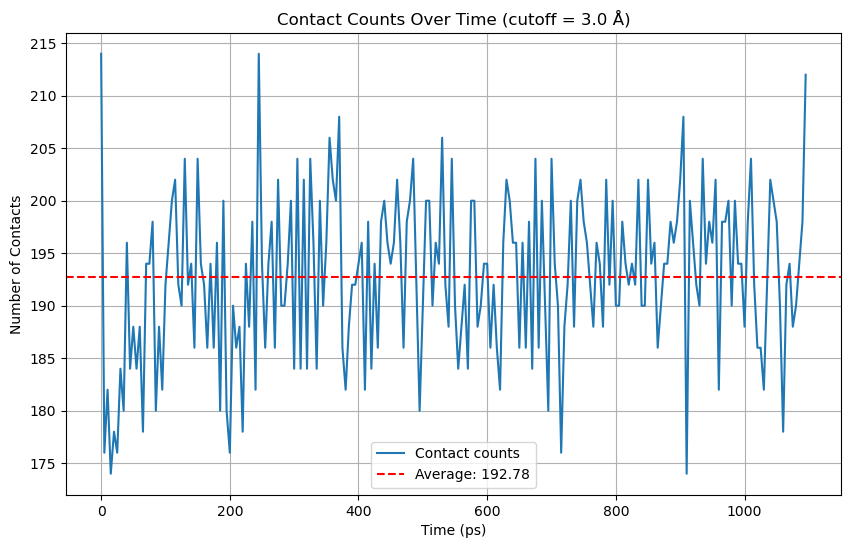

Saved contacts count plot to contact_analysis/contacts_ow_ow_counts_plot.png
Saved contact matrix to contact_analysis/contacts_ow_ow_matrix.csv
Saved heatmap to contact_analysis/contacts_ow_ow_heatmap.png


<Figure size 640x480 with 0 Axes>

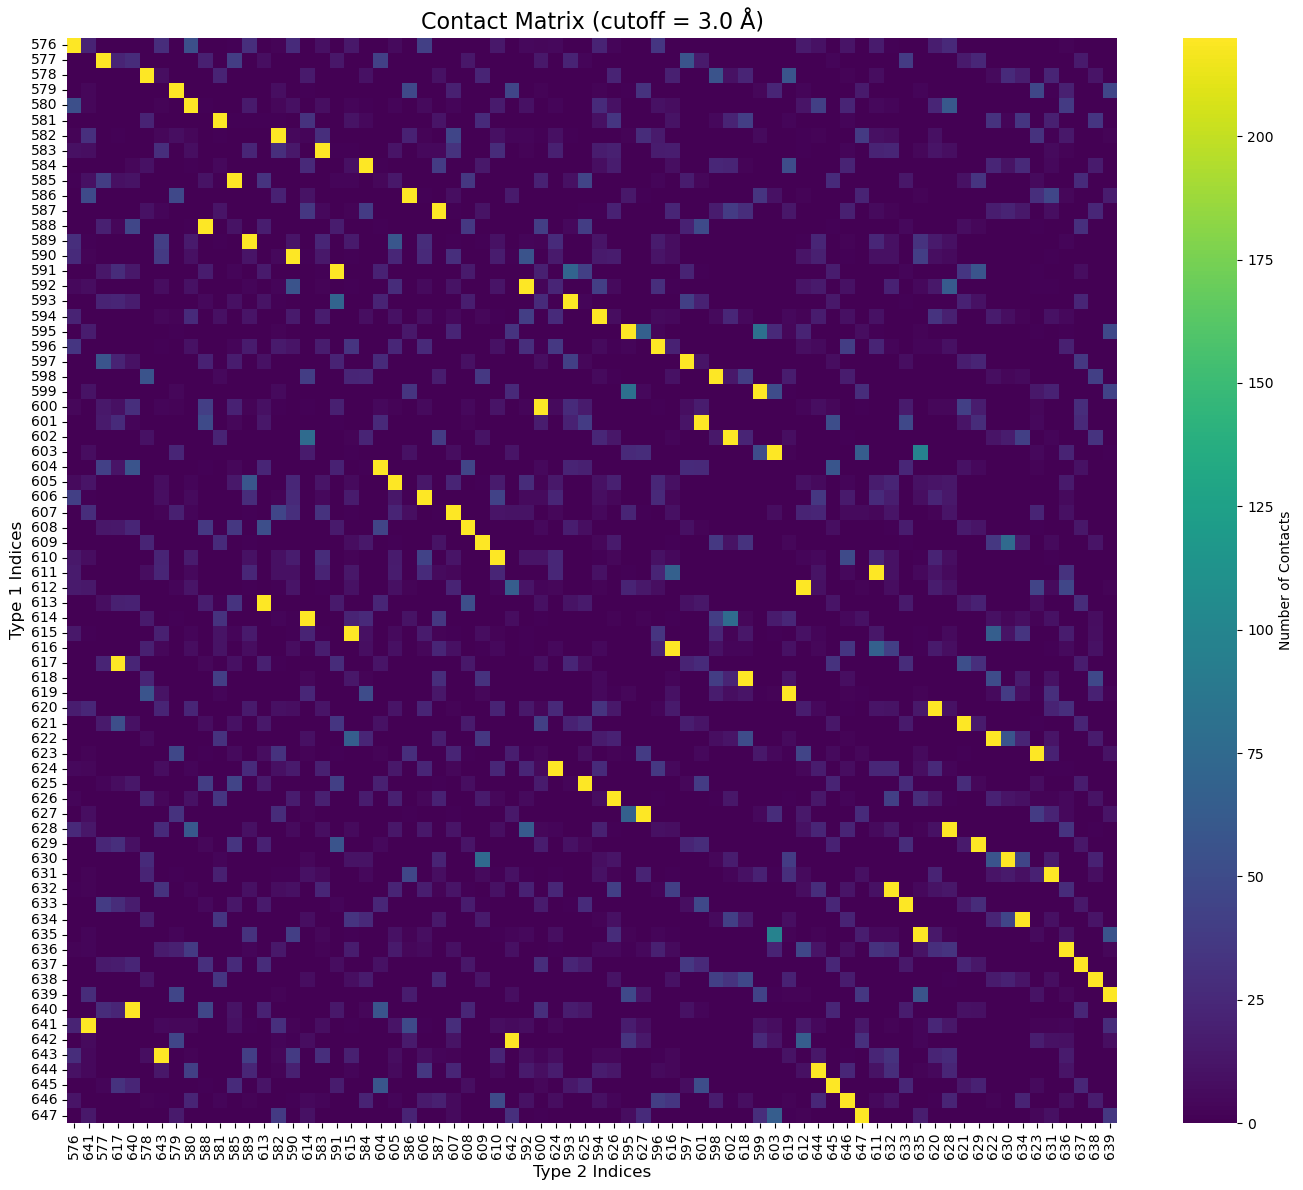

Saved contact statistics to contact_analysis/contacts_ow_ow_statistics.txt


In [3]:
from CRISP.data_analysis.contact import analyze_contacts

results = analyze_contacts(
    trajectory_file="../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj",
    type1_indices_file="../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy",
    type2_indices_file="../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy",
    cutoff_distance=3.0,
    tstep=50.0,
    skip=100,
    output_dir="contact_analysis",  
    output_prefix='contacts_ow_ow',
    plot_heatmap=True,
    plot_contact_counts=True
)

### Clustering

In [2]:
from CRISP.data_analysis.clustering import StructureAnalyzer
help(StructureAnalyzer)

Help on class StructureAnalyzer in module CRISP.data_analysis.clustering:

class StructureAnalyzer(builtins.object)
 |  StructureAnalyzer(traj_file, atom_indices, threshold, min_samples, metric='precomputed', custom_frame_index=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, traj_file, atom_indices, threshold, min_samples, metric='precomputed', custom_frame_index=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  analyze_structure(self, save_html_path=None, output_dir=None)
 |      Analyze the structure and find clusters.
 |      
 |      Parameters:
 |          save_html_path: Path to save HTML visualization (if None, auto-generated)
 |          output_dir: Directory to save all results (overrides path in save_html_path)
 |  
 |  calculate_distance_matrix(self, atoms)
 |      Calculate a distance matrix with periodic boundary conditions.
 |  
 |  find_clusters(self)
 |      Find clusters using DBSCAN.
 |  
 |  read_custom_frame(self)
 | 

In [3]:
from CRISP.data_analysis.clustering import analyze_trajectory
help(analyze_trajectory)

Help on function analyze_trajectory in module CRISP.data_analysis.clustering:

analyze_trajectory(trajectory_path, atom_indices_path, threshold, min_samples, skip_frames=10, output_dir='contact_analysis', save_html_visualizations=True)
    Analyze an entire trajectory with DBSCAN clustering.



#### Frame 

In [6]:
from CRISP.data_analysis.clustering import StructureAnalyzer
import numpy as np
import os

# Define parameters
traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
threshold = 3.0
min_samples = 3
output_dir = "SiAl15_clustering"

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Load atom indices
atom_indices = np.load(indices_file)

# Create analyzer object
analyzer = StructureAnalyzer(
    traj_file=traj_file,
    atom_indices=atom_indices,
    threshold=threshold,
    min_samples=min_samples,
    metric='precomputed',
    custom_frame_index=-1  
)

# # Run analysis with explicit output directory
results = analyzer.analyze_structure(output_dir=output_dir)



Saving results to directory: SiAl15_clustering
3D visualization saved to SiAl15_clustering/nvt_clusters.html

Number of Clusters: 10
Number of Outliers: 9
Silhouette Score: 0.2932
Average Cluster Size: 6.30
Cluster Information:
  Cluster 0: 14 points
  Cluster 1: 9 points
  Cluster 2: 4 points
  Cluster 3: 7 points
  Cluster 4: 10 points
  Cluster 5: 5 points
  Cluster 6: 3 points
  Cluster 7: 4 points
  Cluster 8: 4 points
  Cluster 9: 3 points
Detailed frame data saved to: SiAl15_clustering/frame_data.txt
Full analysis data saved to: SiAl15_clustering/single_frame_analysis.pkl


#### Trajectory

Per-frame data saved to: SiAl15_traj_analysis/nvt_frame_data.txt
3D visualization saved to SiAl15_traj_analysis/nvt_first_frame_clusters.html
3D visualization saved to SiAl15_traj_analysis/nvt_last_frame_clusters.html
Analysis results saved to directory: SiAl15_traj_analysis


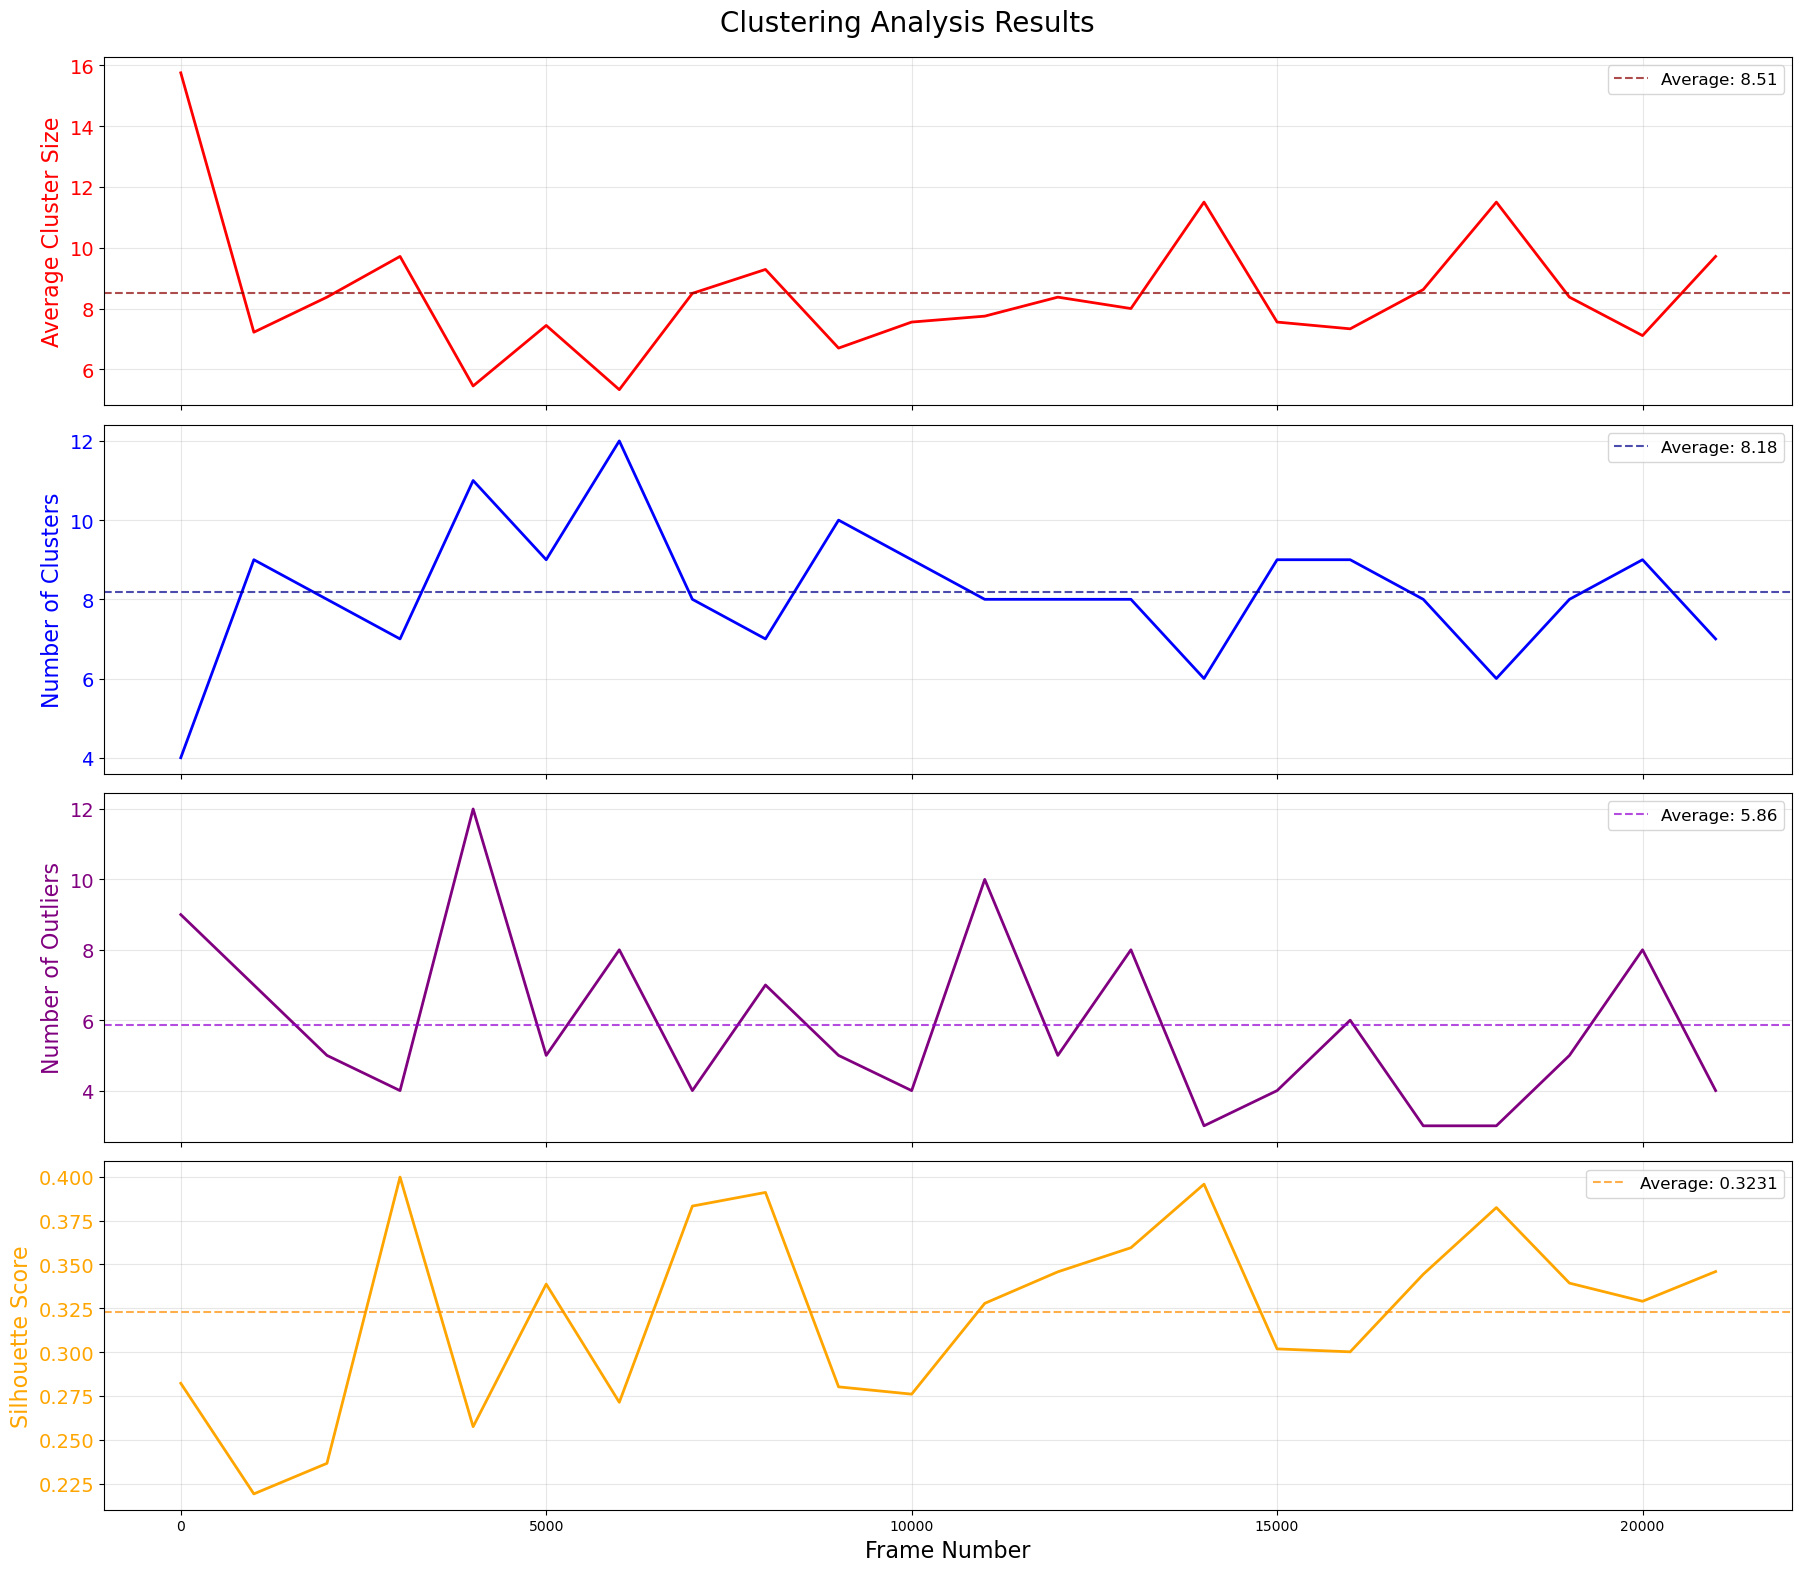

Analysis plot saved to: SiAl15_traj_analysis/SiAl15_traj_clusters_plot.png


In [11]:
from CRISP.data_analysis.clustering import analyze_trajectory, save_analysis_results, plot_analysis_results
import os
import numpy as np

# Define parameters
traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
threshold = 3.0
min_samples = 3
skip_frames = 1000  
output_dir = "SiAl15_traj_analysis"
output_prefix = "SiAl15_traj_clusters"

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Run trajectory analysis
analysis_results = analyze_trajectory(
    trajectory_path=traj_file,
    atom_indices_path=indices_file,
    threshold=threshold,
    min_samples=min_samples,
    skip_frames=skip_frames,
    output_dir=output_dir,
    save_html_visualizations=True  # Save HTML visualizations of first and last frames
)

# Save the numerical results to CSV, TXT, and PKL files
pickle_file = save_analysis_results(
    analysis_results=analysis_results,
    output_dir=output_dir,
    output_prefix=output_prefix
)

# Generate and save plots
plot_analysis_results(pickle_file, output_dir=output_dir)

# Visualisation Data